In [1]:
# librerías a utilizar
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# cargamos los datos
events = pd.read_csv('events.csv', low_memory = False)
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# vemos que el país es sólo para el tipo de evento 'visited site'
events.groupby(['event', 'country']).agg({'count'}).head(10)

timestamp person   url   sku model condition storage  \
                            count  count count count count     count   count   
event        country                                                           
visited site Algeria            1      1     0     0     0         0       0   
             Angola             2      2     0     0     0         0       0   
             Argentina         94     94     0     0     0         0       0   
             Bangladesh         4      4     0     0     0         0       0   
             Belize             1      1     0     0     0         0       0   
             Brazil         84308  84308     0     0     0         0       0   
             Canada            35     35     0     0     0         0       0   
             Cape Verde         1      1     0     0     0         0       0   
             China              1      1     0     0     0         0       0   
             Colombia           4      4     0     0     0         0       0   

                        color  skus search_term       ...        \
                        count count       count       ...         
event        country                                  ...         
visited site Algeria        0     0           0       ...         
             Angola         0     0           0       ...         
             Argentina      0     0           0       ...         
             Bangladesh     0     0           0       ...         
             Belize         0     0           0       ...         
             Brazil         0     0           0       ...         
             Canada         0     0           0       ...         
             Cape Verde     0     0           0       ...         
             China          0     0           0       ...         
             Colombia       0     0           0       ...         

                        campaign_source search_engine channel  \
                                  count         count   count   
event        country                                            
visited site Algeria                  0             0       1   
             Angola                   0             0       2   
             Argentina                0             0      94   
             Bangladesh               0             0       4   
             Belize                   0             0       1   
             Brazil                   0             0   84308   
             Canada                   0             0      35   
             Cape Verde               0             0       1   
             China                    0             0       1   
             Colombia                 0             0       4   

                        new_vs_returning   city region device_type  \
                                   count  count  count       count   
event        country                                                 
visited site Algeria                   1      1      1           1   
             Angola                    2      2      2           2   
             Argentina                94     94     94          94   
             Bangladesh                4      4      4           4   
             Belize                    1      1      1           1   
             Brazil                84308  84308  84308       84308   
             Canada                   35     35     35          35   
             Cape Verde                1      1      1           1   
             China                     1      1      1           1   
             Colombia                  4      4      4           4   

                        screen_resolution operating_system_version  \
                                    count                    count   
event        country                                                 
visited site Algeria                    1                        1   
             Angola                     2                        2   
    

In [11]:
# vemos los países desde los que más se visita la página (¿qué hacer con unknown?)
paises = events.groupby('country').agg({'event':'count'}).sort_values(by='event',ascending = False)[:10]
paises.reset_index(inplace=True)
paises.head()

,country,event
0,Brazil,84308
1,Unknown,2313
2,United States,465
3,Argentina,94
4,Canada,35


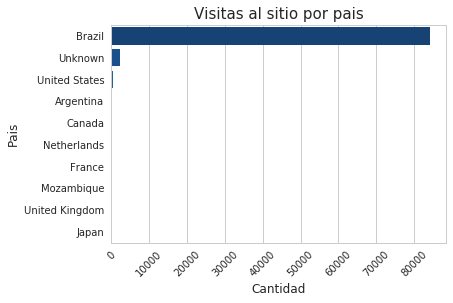

In [23]:
g = sns.barplot(y= paises.country, x=paises.event,  palette=sns.color_palette('Blues_r', 15))
g.set_title("Visitas al sitio por pais", fontsize=15)
g.set_ylabel("Pais", fontsize=12)
g.set_xlabel("Cantidad", fontsize=12)
g.set_xticklabels([0,10000,20000,30000,40000,50000,60000,70000,80000],rotation = 45);

#### Podemos ver que la mayor cantidad de visitas al sitio ocurre en Brasil, analizaremos mas a fondo los datos que tenemos sobre este pais

In [5]:
brazil_events = events[events['country'] == 'Brazil']
brazil_regions = brazil_events.groupby('region').agg({'event':'count'}).sort_values(by='event',ascending = False)[:20]
brazil_regions.reset_index(inplace=True)
brazil_regions.head()

,region,event
0,Sao Paulo,24996
1,Unknown,12378
2,Minas Gerais,7755
3,Rio de Janeiro,6913
4,Bahia,5737


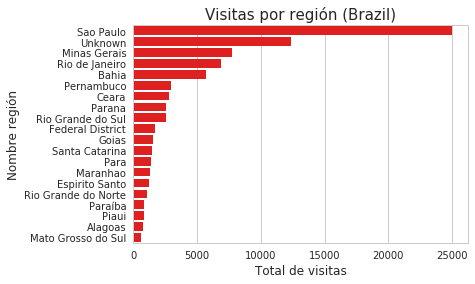

In [9]:
g = sns.barplot(x= brazil_regions.event, y=brazil_regions.region, color = 'red')
g.set_title("Visitas por región (Brazil)", fontsize=15)
g.set_xlabel("Total de visitas", fontsize=12)
g.set_ylabel("Nombre región", fontsize=12);

In [7]:
# vemos por región y ciudad (muchos unknowns ya)
brazil_grouped = brazil_events.groupby(['region', 'city']).agg({'event':'count'}).sort_values(by='event',ascending = False)[:20]
brazil_grouped.reset_index(inplace = True)
brazil_grouped

,region,city,event
0,Unknown,Unknown,12378
1,Sao Paulo,São Paulo,11711
2,Rio de Janeiro,Rio de Janeiro,3538
3,Minas Gerais,Belo Horizonte,2568
4,Bahia,Salvador,2235
5,Federal District,Brasília,1530
6,Sao Paulo,Osasco,1148
7,Parana,Curitiba,1132
8,Ceara,Fortaleza,1084
9,Pernambuco,Recife,913
